In [68]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from subprocess import check_output
%matplotlib inline

In [69]:
train = pd.read_csv("train_mydigits.csv")
print(train.shape)
train.head()

(572, 3265)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,67x39,67x40,67x41,67x42,67x43,67x44,67x45,67x46,67x47,67x48
0,0,0,5,0,1,5,14,0,12,1,...,0,17,0,0,0,0,0,0,0,0
1,0,0,19,0,3,6,0,11,0,8,...,1,1,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,1,1,1,1,...,0,4,0,0,0,0,0,0,0,0
3,0,2,2,0,6,4,0,21,0,0,...,0,0,1,1,1,1,1,1,1,1
4,0,0,2,0,0,6,0,0,0,3,...,3,0,0,0,0,0,0,0,0,0


In [70]:
train = train.sample(frac=1)

In [71]:
train.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,67x39,67x40,67x41,67x42,67x43,67x44,67x45,67x46,67x47,67x48
265,2,0,0,0,0,0,0,0,0,4,...,3,0,0,0,0,0,0,0,0,0
523,9,0,10,0,0,2,0,0,0,5,...,0,9,0,0,0,0,0,0,0,0
209,0,0,4,3,0,1,0,0,4,0,...,2,13,2,2,2,1,1,0,0,0
484,1,1,1,1,1,1,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
322,0,0,0,0,0,0,0,0,0,0,...,0,13,0,0,0,0,0,0,0,0
532,4,3,0,10,0,3,5,65,252,248,...,4,2,2,7,8,2,0,0,0,0
531,3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
27,0,0,0,4,0,2,0,0,0,0,...,0,3,2,2,2,1,1,0,0,0
491,3,1,2,2,1,0,0,1,2,10,...,5,4,0,0,0,0,0,0,0,0
128,0,4,3,0,8,0,6,0,0,12,...,0,0,1,1,1,1,1,1,1,1


In [72]:
z_train = Counter(train['label'])
z_train

Counter({2: 48,
         9: 33,
         0: 152,
         1: 64,
         4: 51,
         3: 33,
         5: 66,
         7: 40,
         6: 58,
         8: 27})

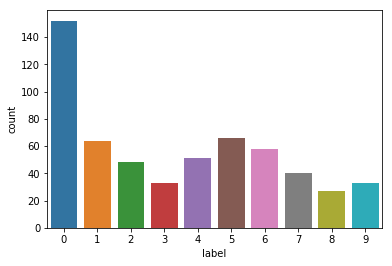

In [73]:
sns.countplot(train['label'])

In [74]:
test= pd.read_csv("test_mydigits.csv")
print(test.shape)
test.head()

(80, 3264)


,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,67x39,67x40,67x41,67x42,67x43,67x44,67x45,67x46,67x47,67x48
0,2,0,10,0,0,11,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,3,4,...,2,4,0,0,0,0,0,0,0,0
2,7,0,1,5,10,0,11,0,6,0,...,3,0,0,0,0,0,0,0,0,0
3,2,0,11,0,1,6,0,7,3,8,...,5,0,0,0,0,0,0,0,0,0
4,7,0,0,0,2,0,0,3,11,0,...,12,0,0,0,0,0,0,0,0,0


In [75]:
test = test.sample(frac=1)

In [76]:
x_train = (train.ix[:,1:].values).astype('float32') 
y_train = train.ix[:,0].values.astype('int32') 
x_test = test.values.astype('float32')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


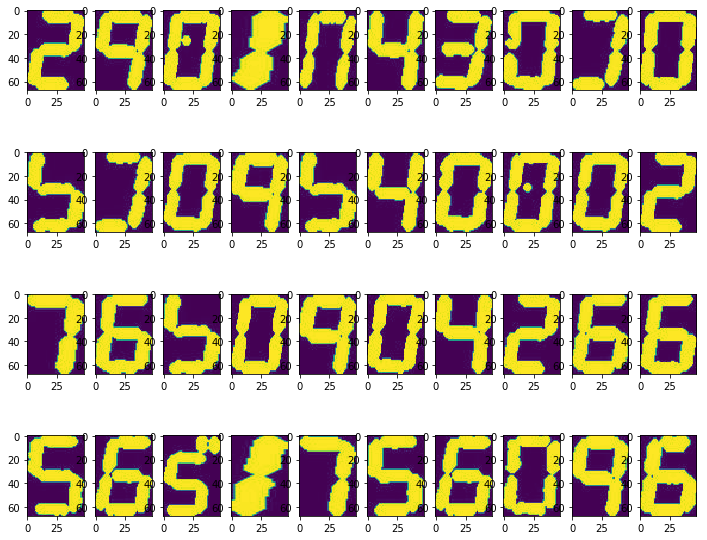

In [77]:
%matplotlib inline
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((68,48)),interpolation='nearest')
plt.show()

In [78]:
#x_train = x_train/255.0
#x_test = x_test/255.0


In [79]:
x_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 10.,  0., ...,  0.,  0.,  0.],
       [ 0.,  4.,  3., ...,  0.,  0.,  0.],
       ...,
       [ 0., 14.,  9., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  9.]], dtype=float32)

In [80]:
y_train

array([2, 9, 0, 1, 0, 4, 3, 0, 3, 0, 5, 3, 0, 9, 5, 4, 0, 0, 0, 2, 7, 6,
       5, 0, 9, 0, 4, 2, 6, 6, 5, 6, 5, 1, 7, 5, 6, 0, 9, 6, 9, 3, 8, 9,
       7, 0, 4, 0, 7, 5, 0, 1, 4, 3, 7, 6, 1, 0, 6, 8, 1, 6, 5, 1, 0, 0,
       2, 0, 5, 5, 3, 0, 0, 5, 7, 0, 0, 1, 0, 0, 6, 7, 6, 6, 8, 3, 4, 5,
       3, 3, 6, 7, 1, 6, 0, 5, 0, 0, 4, 7, 9, 9, 4, 3, 2, 1, 0, 6, 3, 0,
       7, 5, 7, 5, 4, 5, 9, 1, 5, 2, 5, 9, 0, 0, 9, 2, 5, 6, 1, 0, 7, 2,
       0, 0, 6, 0, 9, 3, 5, 4, 8, 7, 5, 0, 5, 5, 0, 3, 8, 0, 0, 0, 1, 5,
       9, 5, 0, 0, 2, 6, 1, 3, 0, 2, 0, 6, 5, 0, 1, 0, 0, 1, 2, 0, 3, 7,
       6, 0, 5, 1, 0, 8, 8, 2, 2, 6, 0, 2, 0, 6, 1, 6, 0, 2, 4, 0, 8, 4,
       2, 7, 0, 9, 0, 9, 6, 0, 0, 4, 4, 7, 7, 2, 0, 9, 5, 0, 1, 5, 3, 2,
       1, 0, 4, 1, 0, 1, 0, 2, 3, 1, 8, 3, 6, 4, 8, 1, 5, 5, 5, 6, 0, 6,
       5, 1, 3, 4, 0, 6, 0, 5, 9, 7, 0, 1, 5, 2, 1, 4, 2, 1, 8, 1, 2, 0,
       1, 0, 1, 0, 4, 1, 2, 0, 2, 4, 1, 5, 8, 1, 1, 1, 0, 5, 4, 0, 9, 6,
       6, 9, 9, 2, 6, 0, 0, 7, 5, 6, 9, 6, 2, 1, 5,

In [81]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (572, 3264)
572 train samples
80 test samples


In [82]:
print(x_train.shape)
print(x_test.shape)

(572, 3264)
(80, 3264)


In [83]:
X_train = x_train.reshape(x_train.shape[0], 68, 48,1)
X_test = x_test.reshape(x_test.shape[0], 68, 48,1)

In [84]:
X_train[0].shape

(68, 48, 1)

In [85]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
batch_size = 64
num_classes = 10
epochs = 20
input_shape = (68, 48, 1)

In [86]:
y_train = keras.utils.to_categorical(y_train, num_classes)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)


In [87]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

In [88]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [89]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

In [90]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=15, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  

In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 66, 46, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 22, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 22, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 22, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 11, 64)        0         
__________

In [92]:
datagen.fit(X_train)
h = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction],)

Epoch 1/20
8/8 [==============================] - 7s 855ms/step - loss: 0.9715 - acc: 0.7266 - val_loss: 0.3584 - val_acc: 0.8276
Epoch 2/20
8/8 [==============================] - 4s 509ms/step - loss: 0.3266 - acc: 0.9167 - val_loss: 0.0842 - val_acc: 0.9655
Epoch 3/20
8/8 [==============================] - 4s 514ms/step - loss: 0.2349 - acc: 0.9405 - val_loss: 0.3276 - val_acc: 0.9310
Epoch 4/20
8/8 [==============================] - 4s 506ms/step - loss: 0.6141 - acc: 0.9105 - val_loss: 0.3082 - val_acc: 0.9655
Epoch 5/20
8/8 [==============================] - 4s 501ms/step - loss: 0.1419 - acc: 0.9782 - val_loss: 0.1735 - val_acc: 0.9828
Epoch 6/20
8/8 [==============================] - 4s 509ms/step - loss: 0.2048 - acc: 0.9703 - val_loss: 0.0688 - val_acc: 0.9828
Epoch 7/20
8/8 [==============================] - 4s 515ms/step - loss: 0.1424 - acc: 0.9683 - val_loss: 0.1927 - val_acc: 0.9310
Epoch 8/20
8/8 [==============================] - 4s 503ms/step - loss: 0.1597 - acc: 0.98

In [93]:
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.247537, final accuracy: 0.965517


In [94]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

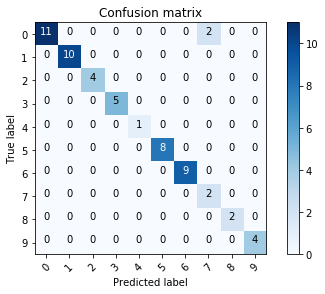

In [95]:
Y_pred = model.predict(X_val)

Y_pred_classes = np.argmax(Y_pred, axis = 1) 

Y_true = np.argmax(Y_val, axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

plot_confusion_matrix(confusion_mtx, classes = range(10))

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


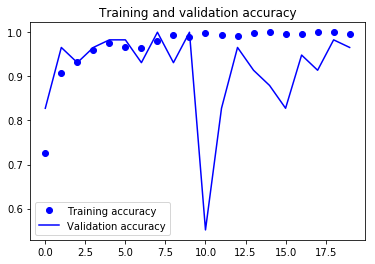

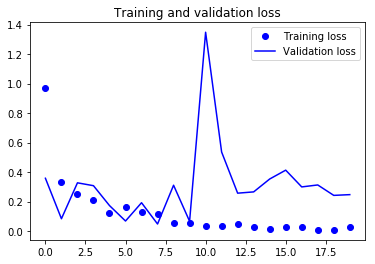

In [98]:
print(h.history.keys())
accuracy = h.history['acc']
val_accuracy = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

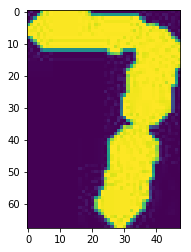

In [101]:
test_im = X_train[37]
plt.imshow(test_im.reshape(68,48), cmap='viridis', interpolation='none')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  This is separate from the ipykernel package so we can avoid doing imports until


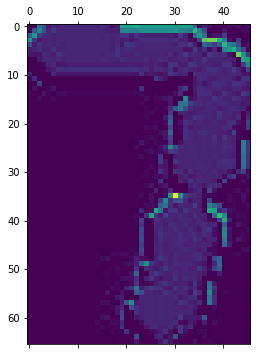

In [102]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,68,48,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

In [103]:

Y_pred = model.predict(X_val)

Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true_classes = np.argmax(Y_val, axis = 1)

In [104]:
Y_pred_classes[:5], Y_true_classes[:5]

(array([9, 3, 2, 4, 2], dtype=int64), array([9, 3, 2, 4, 2], dtype=int64))

In [105]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(Y_true_classes, Y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      0.85      0.92        13
     Class 1       1.00      1.00      1.00        10
     Class 2       1.00      1.00      1.00         4
     Class 3       1.00      1.00      1.00         5
     Class 4       1.00      1.00      1.00         1
     Class 5       1.00      1.00      1.00         8
     Class 6       1.00      1.00      1.00         9
     Class 7       0.50      1.00      0.67         2
     Class 8       1.00      1.00      1.00         2
     Class 9       1.00      1.00      1.00         4

   micro avg       0.97      0.97      0.97        58
   macro avg       0.95      0.98      0.96        58
weighted avg       0.98      0.97      0.97        58



In [106]:
predicted_classes = model.predict_classes(X_test)

In [107]:
predicted_classes.shape

(80,)

In [108]:
test_im.shape
#X_train[44].shape

(68, 48, 1)

In [109]:
sd

NameError: name 'sd' is not defined

In [110]:
pr = model.predict_classes(test_im.reshape((1, 68, 48,1)))
pr

array([7], dtype=int64)

In [111]:
pro = model.predict_proba(test_im.reshape((1, 68, 48,1)))

In [112]:
pro

array([[1.0337253e-06, 2.5564118e-06, 1.4961880e-05, 1.4585568e-04,
        1.2067036e-04, 5.6115216e-05, 1.2577923e-04, 9.9951899e-01,
        7.3846024e-07, 1.3398664e-05]], dtype=float32)

In [113]:
model.save("model_2.h5")